Let's start by generating a synthetic dataset to simulate an email marketing campaign. This dataset will include `user_id`, a binary indicator for `email_sent` (assuming all users received an email), `clicked` (whether they clicked the email), and `converted` (whether they made a purchase after clicking).

In [ ]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

n_users = 1000

# Generate user IDs
user_ids = np.arange(1, n_users + 1)

# Assume all users received an email
email_sent = np.ones(n_users, dtype=int)

# Simulate clicks: Let's say 15% of users click the email
prob_click = 0.15
clicked = np.random.choice([0, 1], size=n_users, p=[1 - prob_click, prob_click])

# Simulate conversions:
# If clicked, let's say 25% convert
# If not clicked, let's say 1% convert (very low)
converted = np.zeros(n_users, dtype=int)

# For users who clicked
converted[clicked == 1] = np.random.choice([0, 1], size=np.sum(clicked == 1), p=[0.75, 0.25])

# For users who did not click
converted[clicked == 0] = np.random.choice([0, 1], size=np.sum(clicked == 0), p=[0.99, 0.01])

# Create the DataFrame
df = pd.DataFrame({
    'user_id': user_ids,
    'email_sent': email_sent,
    'clicked': clicked,
    'converted': converted
})

print(f"Generated a dataset with {n_users} users. Here are the first 5 rows:")
display(df.head())

Generated a dataset with 1000 users. Here are the first 5 rows:


,user_id,email_sent,clicked,converted
0,1,1,0,0
1,2,1,1,0
2,3,1,0,0
3,4,1,0,0
4,5,1,0,0


Now that we have the dataset, let's calculate the overall probability that a user clicks an email: P(clicked).

In [ ]:
# Probability that a user clicks an email: P(clicked)
prob_clicked = df['clicked'].mean()

print(f"Probability of a user clicking an email: {prob_clicked:.4f}")

Probability of a user clicking an email: 0.1530


Next, let's calculate the conditional probability that a user converts given they clicked the email: P(converted | clicked).

In [ ]:
# Probability that a user converts given they clicked: P(converted | clicked)
# We filter for users who clicked (clicked == 1) and then calculate the mean of the 'converted' column.
clicked_users = df[df['clicked'] == 1]
prob_converted_given_clicked = clicked_users['converted'].mean()

print(f"Conditional probability of conversion given a click: {prob_converted_given_clicked:.4f}")

Conditional probability of conversion given a click: 0.3268


Now, let's generate conditional probability tables to see the full picture of `clicked` and `converted` relationships:
1.  **P(Converted | Clicked)**: Probability of conversion given the click status.
2.  **P(Clicked | Converted)**: Probability of click given the conversion status.

In [ ]:
import pandas as pd

# Conditional Probability Table: P(Converted | Clicked)
# The 'index' normalization means that each row sums to 1, showing P(converted | clicked state)
conditional_prob_clicked = pd.crosstab(df['clicked'], df['converted'], normalize='index')
print("Conditional Probability P(Converted | Clicked):")
display(conditional_prob_clicked)

print("\n---\n")

# Conditional Probability Table: P(Clicked | Converted)
# The 'index' normalization means that each row sums to 1, showing P(clicked | converted state)
conditional_prob_converted = pd.crosstab(df['converted'], df['clicked'], normalize='index')
print("Conditional Probability P(Clicked | Converted):")
display(conditional_prob_converted)

Conditional Probability P(Converted | Clicked):


converted,0,1
clicked,,
0,0.985832,0.014168
1,0.673203,0.326797



---

Conditional Probability P(Clicked | Converted):


clicked,0,1
converted,,
0,0.890192,0.109808
1,0.193548,0.806452


Finally, let's visualize these conditional probabilities using bar charts for better understanding and clearer comparison.

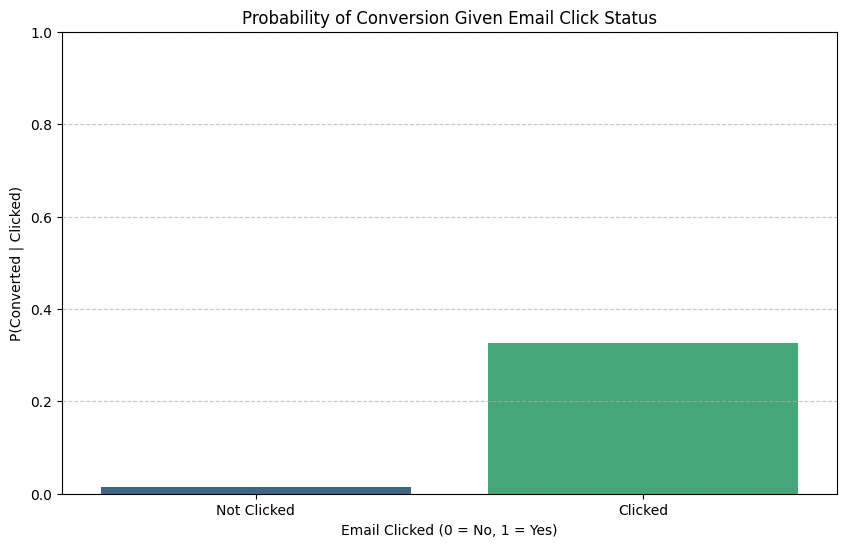

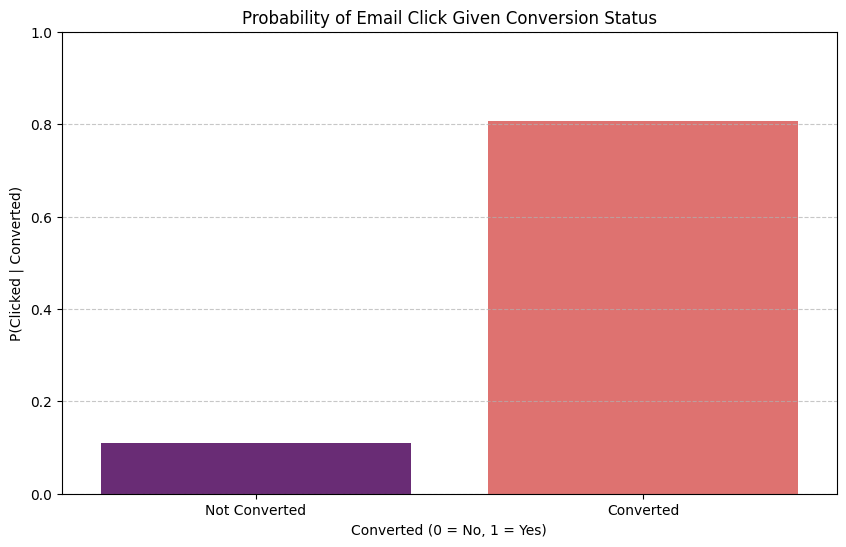

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for visualization P(Converted | Clicked)
# We're interested in P(converted=1 | clicked=0) and P(converted=1 | clicked=1)
plot_data_converted_given_clicked = conditional_prob_clicked.stack().reset_index(name='probability')
plot_data_converted_given_clicked = plot_data_converted_given_clicked[plot_data_converted_given_clicked['converted'] == 1] # Filter for conversion probability

plt.figure(figsize=(10, 6))
sns.barplot(x='clicked', y='probability', hue='clicked', data=plot_data_converted_given_clicked, palette='viridis', legend=False)
plt.title('Probability of Conversion Given Email Click Status')
plt.xlabel('Email Clicked (0 = No, 1 = Yes)')
plt.ylabel('P(Converted | Clicked)')
plt.xticks([0, 1], ['Not Clicked', 'Clicked'])
plt.ylim(0, 1) # Probabilities are between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Prepare data for visualization P(Clicked | Converted)
# We're interested in P(clicked=1 | converted=0) and P(clicked=1 | converted=1)
plot_data_clicked_given_converted = conditional_prob_converted.stack().reset_index(name='probability')
plot_data_clicked_given_converted = plot_data_clicked_given_converted[plot_data_clicked_given_converted['clicked'] == 1] # Filter for click probability

plt.figure(figsize=(10, 6))
sns.barplot(x='converted', y='probability', hue='converted', data=plot_data_clicked_given_converted, palette='magma', legend=False)
plt.title('Probability of Email Click Given Conversion Status')
plt.xlabel('Converted (0 = No, 1 = Yes)')
plt.ylabel('P(Clicked | Converted)')
plt.xticks([0, 1], ['Not Converted', 'Converted'])
plt.ylim(0, 1) # Probabilities are between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()